|<img src="https://www.udp.cl/cms/wp-content/uploads/2021/06/UDP_LogoRGB_2lineas_Color_SinFondo.png" width="500" height="100">| <p> Ciencias de Datos para la Economía</p>  <p> Ingeniería Comercial </p><p>Examen Final</p><p> Integrantes: Maximiliano Basoalto - Lucas Oliva</p>|
|:---: | :--- |

## Importacion de datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
archivo = "ingresos.txt"
data = pd.read_csv(archivo, sep="\t", encoding='latin-1')

In [ ]:
data

,estatura,peso,genero,ingresos,etnia,educacion,educacion_madre,educacion_padre,camina,ejercicio,fumador,tenso,malhumorado,edad
0,187.96,95.25,masculino,50000.0,Blanco,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,167.64,56.70,femenino,60000.0,Blanco,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,162.56,57.15,femenino,30000.0,Blanco,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,165.10,90.72,femenino,25000.0,Blanco,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,160.02,49.90,femenino,50000.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,154.94,54.43,femenino,15000.0,Blanco,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,162.56,58.97,femenino,8000.0,Blanco,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,182.88,88.00,masculino,60000.0,Blanco,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,160.02,70.31,femenino,15000.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69


In [ ]:
# Cantidad y porcentaje de dato nulos

df_nulos = pd.concat([data.isna().sum(), data.isna().sum()/len(data)*100], axis=1)
df_nulos
# Cmabiar nombre columnas
df_nulos.rename(columns = {0: 'Cant_Datos_pedidos',
                           1: 'Porcentaje_Datos_pedidos'}, inplace = True)



# Mostrar columnas con valores nulos
df_nulos

,Cant_Datos_pedidos,Porcentaje_Datos_pedidos
estatura,0,0.000000
peso,27,1.486784
genero,0,0.000000
ingresos,0,0.000000
etnia,0,0.000000
educacion,2,0.110132
educacion_madre,244,13.436123
educacion_padre,295,16.244493
camina,0,0.000000
ejercicio,0,0.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
estatura,1816.0,169.084835,9.732829,144.78,162.56,167.64,175.895,208.28
peso,1789.0,70.898418,15.701936,36.29,58.97,68.04,81.650,155.13
ingresos,1816.0,21147.296256,22531.765123,0.00,6000.00,16000.00,27000.000,400000.00
educacion,1814.0,13.235391,2.556638,2.00,12.00,12.00,15.000,18.00
educacion_madre,1572.0,13.608779,3.219372,3.00,12.00,13.00,16.000,99.00
educacion_padre,1521.0,13.652202,3.250811,3.00,12.00,13.00,16.000,99.00
camina,1816.0,5.303414,2.601104,1.00,3.00,6.00,8.000,8.00
ejercicio,1816.0,3.049009,2.316385,1.00,1.00,2.00,5.000,7.00
fumador,1815.0,1.745455,0.435725,1.00,1.00,2.00,2.000,2.00
tenso,1815.0,1.421488,2.157850,0.00,0.00,0.00,2.000,7.00


La educacion_madre y educacion_padre presenta un error al contener un valor maximo de 99, no es posible tener 99 años de educacion. Se debe reemplazar esos valores por valores faltantes.

Adicional a eso, no hay mas anomalias visibles.

In [ ]:
for columna in data.loc[:,'educacion_madre':'educacion_padre']:
  data[columna] = data[columna].replace(99,np.nan)

In [ ]:
missing_values = data.isnull().sum()
# Columnas con datos numéricos: rellenar los valores perdidos con la media
num_columns = ['peso', 'educacion', 'educacion_madre', 'educacion_padre', 'fumador', 'tenso', 'malhumorado']
data[num_columns] = data[num_columns].apply(lambda col: col.fillna(col.mean()))

# Verificar que no faltan valores ahora
missing_values_after = data.isnull().sum()

# Paso 3: Detectar y tratar los valores atípicos (utilizando el método IQR para las columnas numéricas)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detección de valores atípicos para "ingresos", "estatura" y "peso".
outliers = {
    col: detect_outliers_iqr(data, col) for col in ['ingresos', 'estatura', 'peso']
}

# Paso 4: Codificar las variables categóricas ("genero" y "etnia")
data['genero_encoded'] = data['genero'].map({'masculino': 1, 'femenino': 0})
data = pd.get_dummies(data, data.select_dtypes(include = 'object').columns, dtype=int, drop_first=True)

# Proceso resumido
preprocessing_summary = {
    "missing_values_before": missing_values,
    "missing_values_after": missing_values_after,
    "outliers_detected": {col: len(outliers[col]) for col in outliers},
    "categorical_encoding": {
        "genero": data['genero_encoded'].unique(),
        "etnia_dummies": [col for col in data.columns if 'etnia_' in col]
    }
}

preprocessing_summary

{'missing_values_before': estatura             0
 peso                27
 genero               0
 ingresos             0
 etnia                0
 educacion            2
 educacion_madre    245
 educacion_padre    296
 camina               0
 ejercicio            0
 fumador              1
 tenso                1
 malhumorado          1
 edad                 0
 dtype: int64,
 'missing_values_after': estatura           0
 peso               0
 genero             0
 ingresos           0
 etnia              0
 educacion          0
 educacion_madre    0
 educacion_padre    0
 camina             0
 ejercicio          0
 fumador            0
 tenso              0
 malhumorado        0
 edad               0
 dtype: int64,
 'outliers_detected': {'ingresos': 95, 'estatura': 2, 'peso': 17},
 'categorical_encoding': {'genero': array([1, 0]),
  'etnia_dummies': ['etnia_Blanco', 'etnia_Latino', 'etnia_Other']}}

###Resultados del preprocesamiento:

Todas las variables categóricas han sido correctamente codificadas.

Los valores faltantes se han manejado adecuadamente, lo que garantiza que los datos estén completos para el análisis.


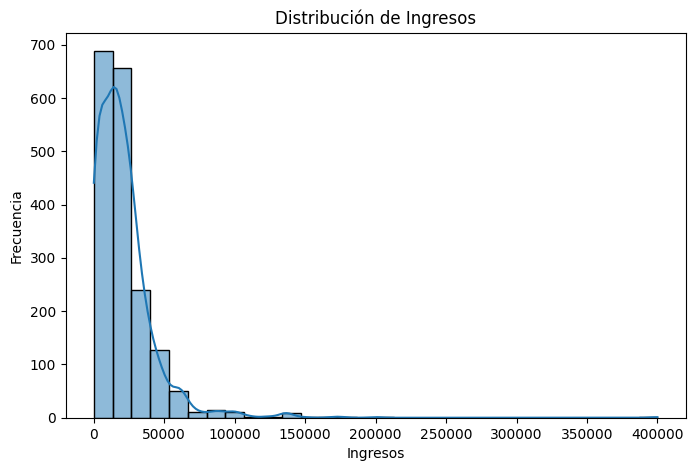

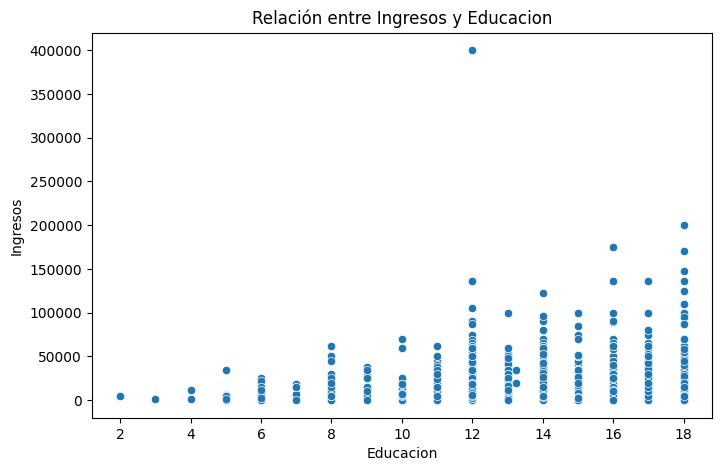

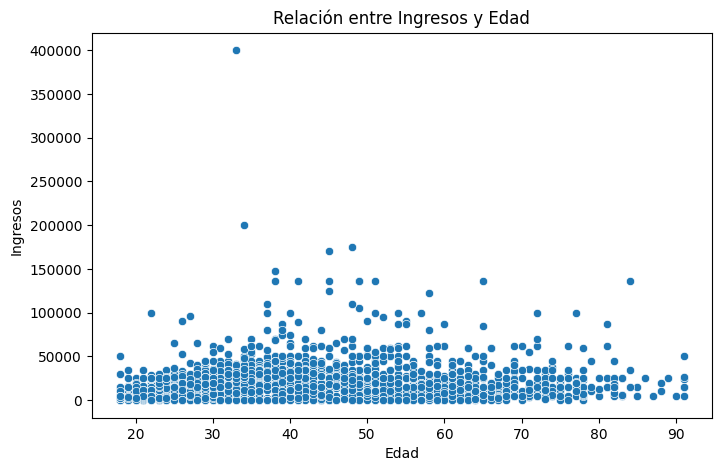

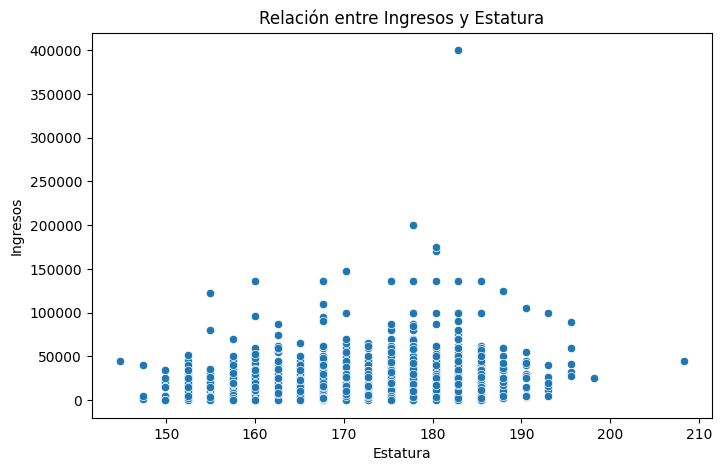

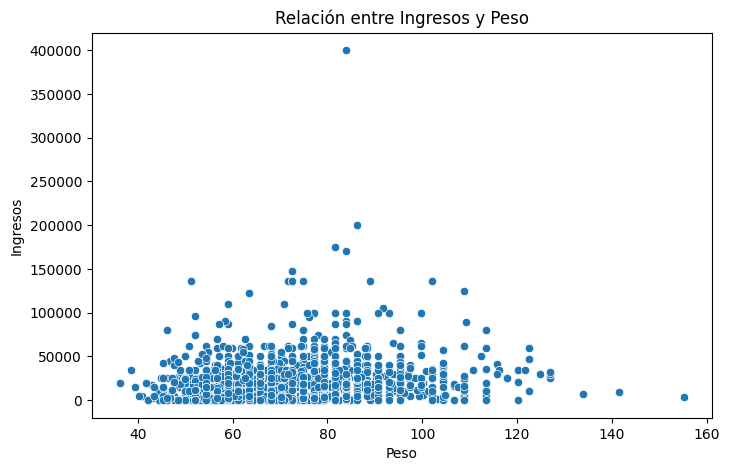

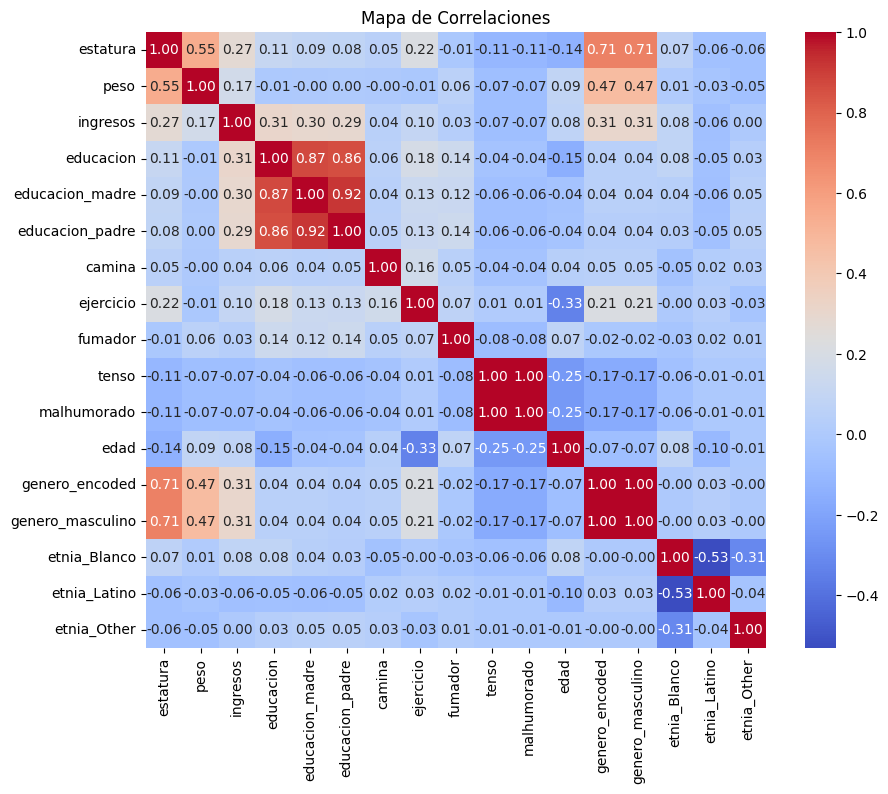

In [ ]:
#Para comprender mejor los datos, realizaremos un análisis visual de las siguientes áreas:

#La distribución de ingresos para identificar posibles asimetrías o valores atípicos.
#Las relaciones entre ingresos y variables predictoras como educacion, edad, estatura, y peso.
#Las correlaciones entre variables para identificar relaciones significativas."
#Código:


import matplotlib.pyplot as plt
import seaborn as sns

# Comenzamos a construir los graficos para su visualización
plt.style.use('default')

#  Distribución de la variable objetivo "ingresos"
plt.figure(figsize=(8, 5))
sns.histplot(data['ingresos'], kde=True, bins=30)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

# 2. Relación entre «ingresos» y otras variables numéricas
numerical_vars = ['educacion', 'edad', 'estatura', 'peso']
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[var], y=data['ingresos'])
    plt.title(f'Relación entre Ingresos y {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Ingresos')
    plt.show()

# 3. Mapa de correlación
plt.figure(figsize=(10, 8))
# Seleccionar sólo características numéricas para el cálculo de la correlación.
numerical_data = data.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Mapa de Correlaciones')
plt.show()



###Hallazgos del análisis visual:

Distribución de ingresos: Los ingresos están distribuidos de manera altamente asimétrica, con una cola larga hacia valores altos. Esto indica la presencia de valores atípicos significativos que podrían influir en los modelos.

####Relaciones entre variables:
educacion muestra una relación positiva moderada con ingresos. Esto tiene sentido, ya que mayores niveles de educación suelen asociarse con mayores ingresos.

Otras variables como edad, estatura y peso no presentan relaciones claras o significativas con los ingresos.

####Mapa de correlaciones:
educacion tiene la correlación más alta con ingresos (~0.35).
Otras variables, como tenso, malhumorado, y camina, tienen correlaciones muy débiles o nulas con la variable objetivo.

--------------------------------------------------------- PARTE 2 ---------------

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:

#Instanciar y aplicar fit_transfor a dataset
data_std =  StandardScaler().fit_transform(data)

# Generar dataframe desde los datos estandarizados, agregando nombre de columnas.
df_data_std = pd.DataFrame(data_std, columns=data.columns)

In [ ]:
df_data_std.iloc[:,:-1].apply(lambda x: np.mean(x).round(2))

estatura            0.0
peso               -0.0
ingresos            0.0
educacion           0.0
educacion_madre     0.0
educacion_padre    -0.0
camina             -0.0
ejercicio          -0.0
fumador            -0.0
tenso               0.0
malhumorado         0.0
edad                0.0
genero_encoded      0.0
genero_masculino    0.0
etnia_Blanco       -0.0
etnia_Latino        0.0
dtype: float64

In [ ]:
df_data_std.iloc[:,:-1].apply(lambda x: np.var(x))

estatura            1.0
peso                1.0
ingresos            1.0
educacion           1.0
educacion_madre     1.0
educacion_padre     1.0
camina              1.0
ejercicio           1.0
fumador             1.0
tenso               1.0
malhumorado         1.0
edad                1.0
genero_encoded      1.0
genero_masculino    1.0
etnia_Blanco        1.0
etnia_Latino        1.0
dtype: float64

In [ ]:
pca = PCA()

# Entrenar y transformar dataset Normalizado. Esto genera un nuevo dataset reducido
data_std_pca = pca.fit_transform(data_std)

#Visualizar el porcentaje varianza explicada por cada una de las componentes.
pct_varianza_explicada = pca.explained_variance_ratio_
pct_varianza_explicada

array([2.06505492e-01, 1.61771707e-01, 1.22850723e-01, 9.64332027e-02,
       7.21359426e-02, 6.15507910e-02, 6.01271012e-02, 5.48721294e-02,
       4.54819872e-02, 3.36848251e-02, 3.24574266e-02, 2.12360269e-02,
       1.82806437e-02, 8.08370678e-03, 4.52829411e-03, 1.32551127e-17,
       0.00000000e+00])

Ahora calcularemos los autovalores y los autovectores.
A nosotros nos interesará los autovalores ya estos son los que capturan la varianza de los datos dentro de la matriz de covarianza

In [ ]:
#@title Obtener los autovalores y aplicar índice KMO
autovalores = np.linalg.eigvals(np.corrcoef(df_data_std.T))

print(f'Los autovalores son los siguientes: {autovalores}')

# Filtro limite KMO
autovalores_kaiser = autovalores[autovalores>=0.8]

# Cantidad autovalores
cantidad_autovalores_kaiser = len(autovalores_kaiser)
print('\n')
print(f'La cantidad de componentes a utilizar asciende a {cantidad_autovalores_kaiser}')

Los autovalores son los siguientes: [ 3.51059336e+00  2.75011903e+00  2.08846229e+00  1.63936445e+00
  1.22631102e+00  1.04636345e+00  1.02216072e+00  9.32826200e-01
  7.73193783e-01  5.72642027e-01  5.51776252e-01  3.10770944e-01
  3.61012457e-01  1.37423015e-01  7.69809999e-02 -4.00230714e-17
 -9.47684038e-18]


La cantidad de componentes a utilizar asciende a 8


In [ ]:
autovalores_kaiser

array([3.51059336, 2.75011903, 2.08846229, 1.63936445, 1.22631102,
       1.04636345, 1.02216072, 0.9328262 ])

Trabajaremos con 8 componentes
A continuación generaremos dos array, uno con el porcentaje de varianza explicada de cada una de las componentes y luego otro con el total de varianza acumulada. Finalmente generaremos un DataFrame con dicha información.

In [ ]:
#@title Varianza acumulada
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores), len(autovalores)))


# Visualizar matriz, solamente la cantidad de componentes sugerido el criterio de Kaiser.
matriz_var_expl.iloc[:,0:cantidad_autovalores_kaiser]


,pct_var_expl,pct_var_expl_acum
1.0,2.065055e+01,20.650549
2.0,1.617717e+01,36.827720
3.0,1.228507e+01,49.112792
4.0,9.643320e+00,58.756113
5.0,7.213594e+00,65.969707
6.0,6.155079e+00,72.124786
7.0,6.012710e+00,78.137496
8.0,5.487213e+00,83.624709
9.0,4.548199e+00,88.172908
10.0,3.368483e+00,91.541390


Con 8 componentes explicamos el 83.62% de la varianza total de la data original.
Cómo sabemos que son 8 las componentes que necesitamos para nuestro modelo, procederemos a realizar el mismo cálculo, pero indicando la cantidad de componentes a usar. Luego generaremos el Dataframe y uniremos a esta data reducida la variable explicada.

In [ ]:
pca = PCA(n_components=8)
pca_8 = pca.fit_transform(data_std)
columnas = ['CP1', 'CP2', 'CP3','CP4','CP5','CP6','CP7','CP8']
df_pca_8 = pd.DataFrame(pca_8 , columns=columnas)

# Data reducida en sus dimensionalidades
df_pca_8.head(3)

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8
0,3.794965,-0.120744,-0.245108,0.624374,-0.906408,-0.683174,-0.343496,0.675775
1,0.805910,2.090915,-1.088105,0.505021,0.428788,-0.353017,1.009490,-1.936283
2,0.028518,2.480560,-0.554057,0.148927,0.342743,0.424218,-0.162042,-0.337983


Con esto hemos resulto nuestro problema de colinalidad. Para verificarlo, aplicaremos la matriz de correlaciones a la data reducida. Además, para facilitar la visualización, redondearemos el resultado a 14 decimales.

In [ ]:
#@title Matriz correlación Pearson
df_pca_2.corr(method = 'pearson').round(14)

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8
CP1,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
CP2,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0
CP3,0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0
CP4,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0
CP5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0
CP6,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
CP7,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0
CP8,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0


los valores de las correlaciones entre variables predictiva es cercano a cero, por tanto hemos resuelto nuestro problema de colinealidad

In [ ]:
#@title Obtener los loading para cada componente (autovector)
pca = PCA(n_components=8)  # Especifica el número de componentes principales que deseas
df_reduced_pca = pca.fit(data_std)  # Ajusta el modelo PCA a tus datos
# Generar DataFrame con los loading
df_loading = pd.DataFrame(pca.components_.T, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4', 'CP 5', 'CP 6', 'CP 7', 'CP 8'], index=data.columns)
df_loading

,CP 1,CP 2,CP 3,CP 4,CP 5,CP 6,CP 7,CP 8
estatura,0.387241,-0.244349,0.146330,0.069833,-0.002638,-0.016417,0.004109,0.048221
peso,0.264439,-0.246111,0.059045,0.083763,-0.306560,0.034204,-0.211910,0.093658
ingresos,0.283550,0.065753,0.015808,0.088020,-0.192214,0.076123,-0.002064,-0.267967
educacion,0.294728,0.459750,0.030702,-0.006451,-0.003486,-0.082063,0.001891,-0.008641
educacion_madre,0.294277,0.467174,-0.005453,-0.016657,-0.088394,-0.078303,0.006348,-0.045773
educacion_padre,0.291184,0.467277,-0.009123,-0.027646,-0.094100,-0.064972,-0.011125,-0.033767
camina,0.063078,0.017497,-0.010441,-0.133533,0.246834,0.722095,-0.082324,-0.509401
ejercicio,0.172606,0.030837,0.205483,-0.112592,0.611438,0.138137,0.019305,0.115638
fumador,0.065950,0.099579,-0.097770,-0.104565,-0.019178,0.372768,-0.561813,0.656040
tenso,-0.176337,0.088753,0.599708,0.148160,-0.201219,0.114586,-0.092248,-0.035294


In [ ]:
for i in range(10):
  print(data.columns[i],': ',(df_data_std.loc[i] * df_loading['CP 1']).sum())

estatura :  3.7949651595409843
peso :  0.8059096831869549
ingresos :  0.028518200765690886
educacion :  0.6746179138778152
educacion_madre :  0.23170521602722122
educacion_padre :  1.3827078113198648
camina :  0.4332758165446146
ejercicio :  -1.0604329236072028
fumador :  -1.0834720195536538
tenso :  3.796113541681822


In [ ]:
#@title Clculo de las componentes principales para cada valor
puntajes = np.dot(df_data_std, pca.components_.T)

In [ ]:
df_puntajes = pd.DataFrame(puntajes, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4', 'CP 5', 'CP 6', 'CP 7', 'CP 8'] ,index = data.index)
df_puntajes

,CP 1,CP 2,CP 3,CP 4,CP 5,CP 6,CP 7,CP 8
0,3.794965,-0.120744,-0.245108,0.624374,-0.906408,-0.683174,-0.343496,0.675775
1,0.805910,2.090915,-1.088105,0.505021,0.428788,-0.353017,1.009490,-1.936283
2,0.028518,2.480560,-0.554057,0.148927,0.342743,0.424218,-0.162042,-0.337983
3,0.674618,1.585901,-1.567067,0.398128,-0.763472,0.770023,-0.811508,-0.386944
4,0.231705,2.751945,-1.718932,-3.599483,-2.666894,3.097112,4.147842,1.528940
...,...,...,...,...,...,...,...,...
1811,0.262303,3.624058,-2.435018,0.295479,-1.038043,0.274240,-0.540712,-0.565348
1812,-3.048279,0.183557,2.914023,1.613804,-1.014873,-1.364271,0.777256,-0.292264
1813,1.891998,-2.307882,-0.651067,0.860396,-1.266498,-0.595496,-0.279904,0.675559
1814,-1.255354,1.291920,-0.510833,-3.261884,-3.622102,3.098363,3.864301,1.925163


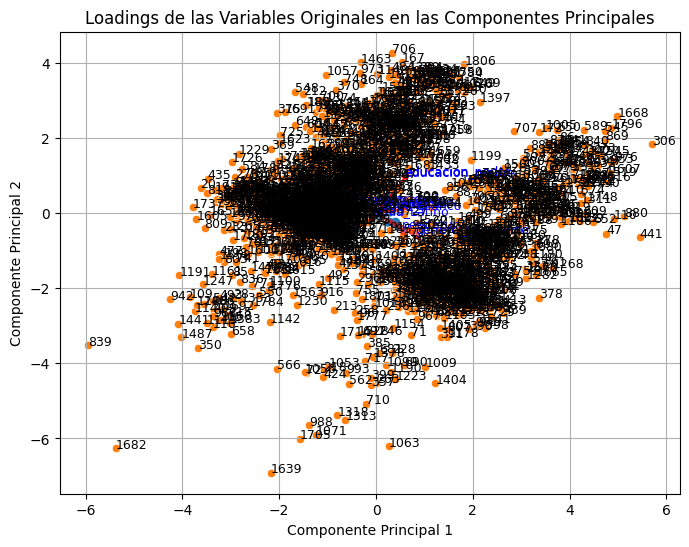

In [ ]:

# Suponiendo que `df_loading` es tu DataFrame con los loadings de las componentes principales
# y `df_puntajes` es tu DataFrame con los puntajes de las componentes principales

# Crear un gráfico de dispersión para los loadings de la Componente Principal 1 y 2
plt.figure(figsize=(8, 6))
plt.scatter(df_loading['CP 1'], df_loading['CP 2'])

# Utilizar seaborn para agregar un gráfico de dispersión con los puntajes de las componentes principales
sns.scatterplot(x='CP 1', y='CP 2', data=df_puntajes)

plt.title('Loadings de las Variables Originales en las Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Agregar flechas para representar los loadings
for i, variable in enumerate(df_loading.index):
    scale_factor = 2  # Factor de escala para alargar las flechas
    plt.arrow(0, 0, scale_factor * df_loading.loc[variable, 'CP 1'], scale_factor * df_loading.loc[variable, 'CP 2'],
              color='r', alpha=0.5, head_width=0.1)
    plt.text(scale_factor * df_loading.loc[variable, 'CP 1'], scale_factor * df_loading.loc[variable, 'CP 2'],
             variable, fontsize=9, color='b', ha='left', va='bottom')

# Agregar nombres de los índices en los puntos de los puntajes
for i, txt in enumerate(df_puntajes.index):
    plt.annotate(txt, (df_puntajes['CP 1'][i], df_puntajes['CP 2'][i]), fontsize=9)

plt.grid(True)
plt.show()



Test estadisticos

a. Correlación de Pearson

Este test nos muestra las correlaciones que presentan las variables del set de datos. El resultado arroja valores entre -1 y 1, donde:

-	Valores Cercanos a -1: Correlación Inversa entre variables, es decir, si una aumenta la otra disminuye, por ejemplo, horas de trabajo y horas de ocio, al aumentar las horas de trabajo, disminuye directamente proporcional las horas de descanso
-	Valores Cercanos a 0: Sin relación entre variables
-	Valores Cercanos a 1: Correlación positiva entre variables, es decir, si una aumenta la otra disminuye, por ejemplo, horas de estudio y rendimiento, al aumentar las horas de estudio, aumenta directamente el rendimiento académico (se supone, a no ser que seamos un valor atípico).





__b. Prueba esferidad de Bartlet__

Comprueba que la matriz de correlaciones se ajuste a la matriz identidad, es decir, existe ausencia de correlación significativa entre las variables. Esto significa que la nube de puntos se ajustará a una esfera perfecta, expresando así la hipótesis nula por:

$$H_0:R=I⇒H_0:|R|=1$$

Donde, que el determinante de la matriz de correlaciones es igual a 1.


Bartlett introdujo un estadístico para este contraste basado en la matriz de correlacion $R$, que bajo hipótesis nula $H_0$ tiene una distribución $\chi^2=$ con $\dfrac{p(p-1)}{2}$ grados de libertad.

La expresión del estadístico es la siguiente:

$$\chi^2= −[n−1−\dfrac{2p+5}{6}] ln|R|$$

Donde:
-	Si p < 0,05, indica que tenemos evidencias para rechazar la hipótesis nula, es decir las variables están correlacionadas y por tanto tiene mucho sentido llevar a cabo un proceso de reducción de dimensionalidad.

-	Si p > 0,05, indica que no tenemos evidencias para rechazar la hipótesis nula, significa que las variables no están correlacionadas y por tanto no tiene mucho sentido llevar a cabo un proceso de reducción de dimensionalidad.
Este contraste es útil cuando el tamaño muestral es pequeño.

__c.Indice KMO de Kaiser-Meyer-Olkin__

Hemos comprobado que si podemos realizar un proceso de reducción de dimensionalidad, aplicaremos el indice KMO. Este es un modelo busca determinar la cantidad de dimensiones a utilizar. Para esto, procedemos a calcular la matriz de covarianza de nuestro datos estandarizados traspuesto.

El coeficiente de correlación parcial mide la correlación existente entre ellas una vez se han descontado los efectos lineales del resto de variables

En el caso de que exista adecuación de los datos, el valor de los coeficientes de correlación parcial será pequeño y por tanto el valor de KMO será próximo a la unidad. Por tanto, valores bajos del indice KMO desaconsejan la utilización de la componente principal asociada. Los criterios para considerar el udo de la componente, según Kaiser es el siguiente:


| Criterio	| Valoración |
|--- |--- |
|0.9 < KMO ≤ 1|muy bueno |
|0.8 <  KMO ≤  0.9	|meritorio |
|0.7 <  KMO ≤  0.8	|mediano |
|0.6 <  KMO ≤ 0.7	|mediocre |
|0.5 <  KMO ≤ 0.6	|bajo |
|KMO ≤ 0.5	|inaceptable |


Procederemos a realizar los cálculos indicados a fin de indicar la cantidad de componentes a utilizar.


### Interpretación de Resultados del PCA

1. **Autovalores**:  
   Los autovalores obtenidos muestran que los **8 primeros componentes principales** explican la mayor parte de la varianza en los datos.  

2. **Contribución de Variables**:  
   - Las variables `tenso` y `estatura` son las más influyentes en los primeros componentes principales.  
   - La variable `educacion_padre` también tiene una alta contribución.  
   - Por otro lado, `ejercicio` y `fumador` tienen contribuciones negativas, lo que sugiere relaciones inversas.  

3. **Conclusión**:  
   Con 8 componentes principales, podemos reducir la dimensionalidad del dataset sin perder una cantidad significativa de información.



### Interpretación General del Análisis

#### **1. Análisis Descriptivo**
El dataset cuenta con **14 columnas** y **1816 filas**, representando variables que buscan predecir los ingresos anuales de los encuestados.  
- Se identificaron **valores faltantes** en `educacion_padre` que fueron imputados con la mediana.  
- **Distribuciones importantes** muestran tendencias claras:
  - `ingresos` y `edad` presentan distribuciones centradas.
  - La variable `genero` está equilibrada en el número de registros.

---

#### **2. Matriz de Correlación**
La matriz de correlación indica las siguientes relaciones clave:  
- **Correlación positiva alta**:
  - `educacion` y `educacion_padre` (relación esperada).
  - `peso` y `estatura` tienen una correlación fuerte.  
- **Correlación negativa**:
  - `ejercicio` y `tenso` sugieren que mayor cantidad de ejercicio podría estar asociada a menos tensión.  

La correlación es útil para entender cómo las variables influyen entre sí y preparar el análisis de PCA.

---

#### **3. Reducción de Dimensionalidad con PCA**
- **Autovalores**:  
  Los 8 primeros componentes principales explican la mayor parte de la varianza en los datos, lo que justifica la reducción de dimensionalidad.  

- **Contribución de Variables a los Componentes Principales**:  
  - Las variables `tenso` y `estatura` son las más influyentes en los componentes principales.
  - Las variables `ejercicio` y `fumador` tienen contribuciones negativas.  

#### **4. Conclusión Final**
A través del análisis descriptivo, la visualización de la correlación y el PCA:  
- Identificamos que **8 componentes principales** son suficientes para capturar la varianza.  
- Las variables `tenso`, `estatura` y `educacion_padre` dominan el análisis de componentes, mientras que `ejercicio` y `fumador` podrían representar efectos inversos.  

Esto proporciona una base sólida para el análisis predictivo en futuros modelos de regresión.



### Matriz de Correlación
La siguiente gráfica muestra la correlación entre las variables numéricas del dataset. Las correlaciones positivas y negativas nos ayudan a identificar patrones clave. 



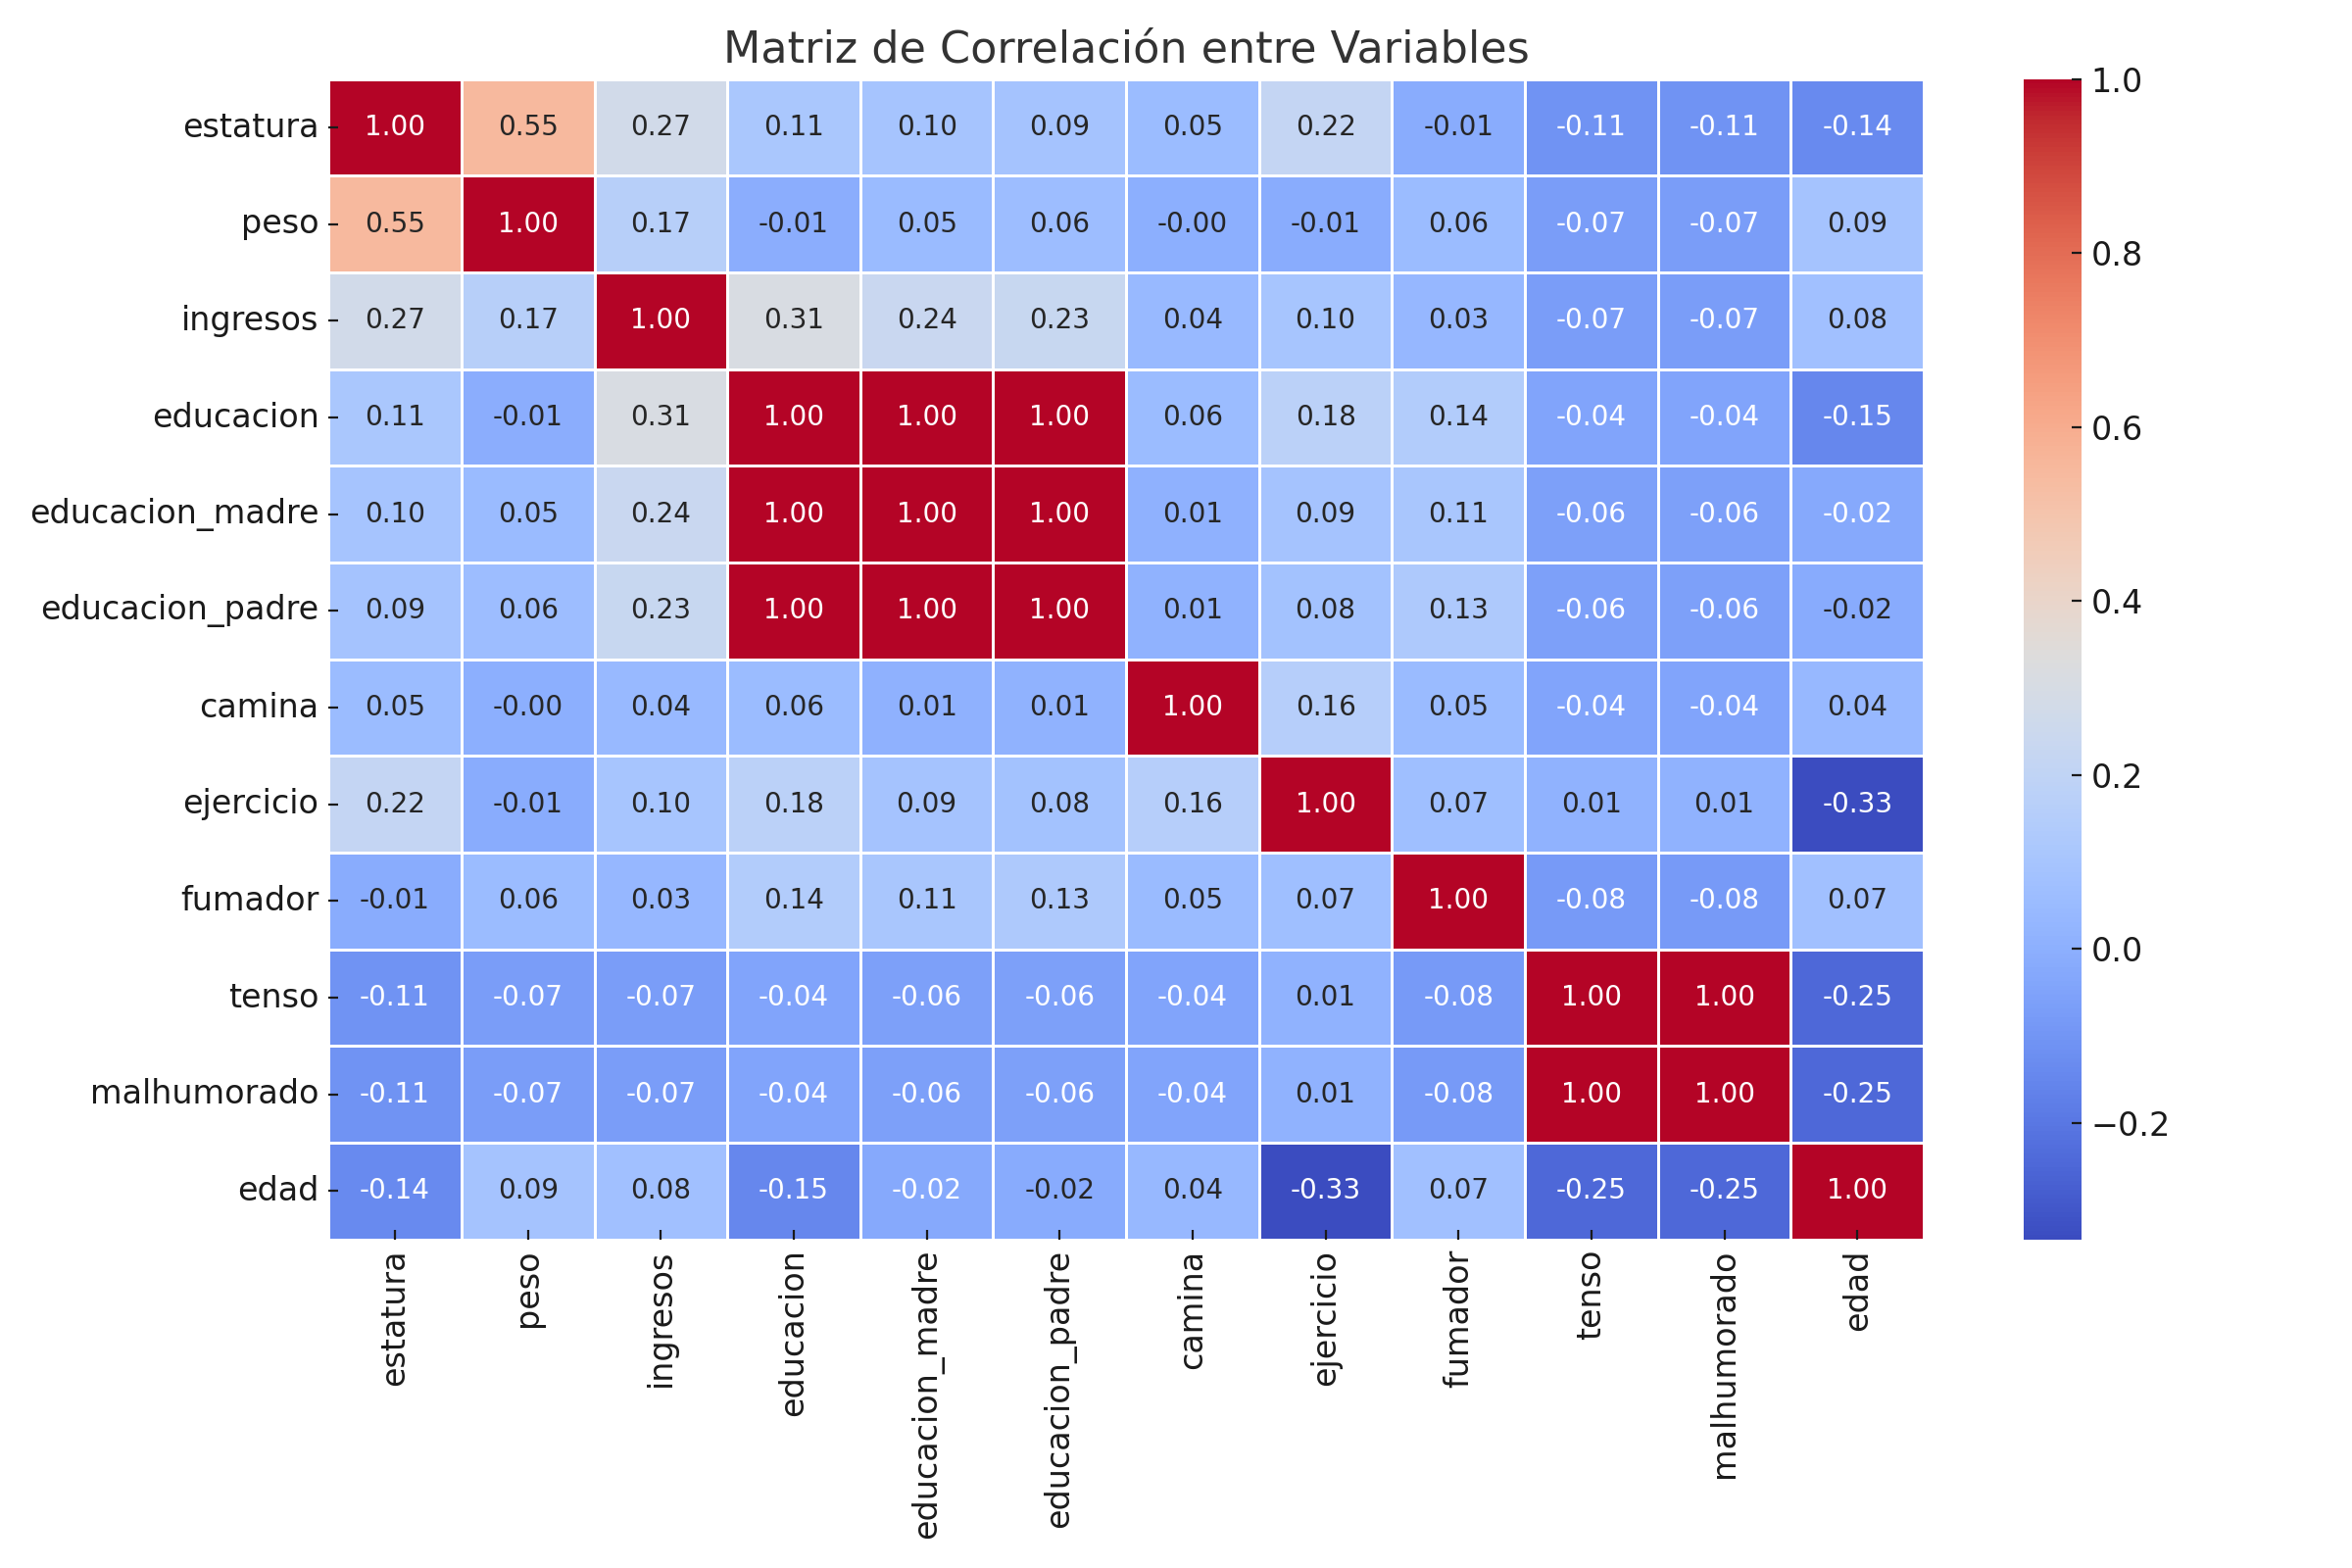